In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/MachineLearning/main/Datasets/dataset_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [5]:
#Ver estadisticas de los datos
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Verificar si hay datos nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Ver tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Procesando los datos

---

* Cambiando de sexo a numero
* Cambio de embarque a numero
* Tratamiento a edad faltante (eliminar datos nulos)
* Eliminar cabina
* Eliminar atributos innecesarios
* Eliminar filas sin datos


##Cambiando los valores de las variables sexo y embarque

In [12]:
sorted(df['Sex'].unique())

['female', 'male']

In [13]:
datos_sex = {'Sex':{'female': 0, 'male' : 1}}
df.replace(datos_sex,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
datos_Embarked = {'Embarked':{'S':0,'C':1,'Q':2}}
df.replace(datos_Embarked,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


##Remplazando edades nulas en el promedio de edades 

In [22]:
#Tratar las edades faltantes
#Reemplazar las edades faltantes por la media de las edades
print(df['Age'].mean())

29.69911764705882


In [23]:
df['Age'] = df['Age'].replace(np.nan,30)

##Eliminamos la columna cabina

In [26]:
df = df.drop(columns='Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


##Eliminar atributos innecesarios

In [28]:
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


##Borramos datos nulos

In [29]:
df = df.dropna(how='any')
df.shape

(889, 8)

##Graficas

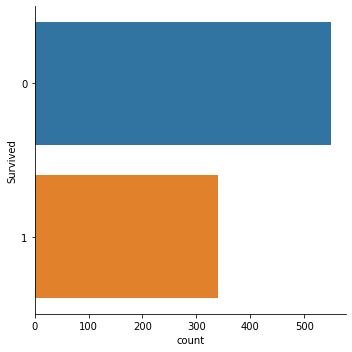

In [30]:
g = sns.catplot(y='Survived',data = df, kind='count')

#Empezamos el entrenamiento

##Dividimos las etiquetas (Train y Test)

In [31]:
x = df.drop(columns='Survived')
y = df['Survived']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [57]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()
#entrenando modelo de regresión logistica
regresion_logistica.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
print("Precision del modelo por regresin logistica: ",regresion_logistica.score(x_train,y_train)*100)

Precision del modelo por regresin logistica:  79.60618846694796


#Arboles de decision

In [63]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print("Precicion con el modelo ARBOLES DE DECISION: ",tree.score(x_train,y_train)*100)

Precicion con el modelo ARBOLES DE DECISION:  98.31223628691983


###Creando el arbol graficamente

In [65]:
#Instanciamos la lista de valores que toma el arbol
class_names_list=list(['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(tree,feature_names=class_names_list, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_1.png')

True

#Regresion Lineal

In [60]:
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression()
regresion_lineal.fit(x_train, y_train)
y_pred = regresion_lineal.predict(x_test)
print("Precicion con el modelo REGRESION LINEAL: ",regresion_lineal.score(x_train,y_train)*100)

Precicion con el modelo REGRESION LINEAL:  39.6849388081358


#Support Vector Machine

In [68]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Precision con el modelo SUPORT VECTOR MACHINE: ",svm.score(x_train,y_train)*100)

Precision con el modelo SUPORT VECTOR MACHINE:  68.07313642756681


#Vecino mas cercano KMN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

kme = KNeighborsClassifier(n_neighbors = 3)
kme.fit(x_train,y_train)
y_pred = kme.predict(x_test)
print("Precision con el modelo VECINO MAS CERCANO (KMN) : ",kme.score(x_train,y_train)*100)

Precision con el modelo VECINO MAS CERCANO (KMN) :  83.26300984528832
